<a href="https://colab.research.google.com/github/Uzma-Jawed/AIandDataSci-class_work-and-practice/blob/main/31_SupervisedLearningModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Linear Regression Implementation with OLS Method**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



---

### Ordinary Least Squares (OLS) Linear Regression Implementation


---
This implementation solves the normal equation for linear regression:
θ = (XᵀX)⁻¹Xᵀy

Where:

* θ is the parameter vector (weights + bias)

* X is the feature matrix with an added column of 1s for the bias term

* y is the target vector


In [ ]:
class NormalLinearRegression:
    """
    A linear regression model that uses the Ordinary Least Squares (OLS) method
    to find the optimal parameters by solving the normal equation.
    """

    def __init__(self) -> None:
        """Initialize the linear regression model."""
        self.X = None
        self.Y = None
        self.theta = None

    def fit(self, x, y):
        """
        Fit the linear regression model to the training data.

        Parameters:
        -----------
        x : array-like, shape (n_samples, n_features)
            Training input/feature matrix
        y : array-like, shape (n_samples,)
            Target values

        Returns:
        --------
        theta : array, shape (n_features + 1, 1)
            Optimal parameters including bias term
        """
        self.X = np.array(x)
        self.Y = np.array(y)

        # Reshape if X is a 1-D array
        if self.X.ndim == 1:
            self.X = self.X.reshape(-1, 1)

        # Add column of 1s for the bias term (intercept)
        self.X = np.concatenate([np.ones((self.X.shape[0], 1)), self.X], axis=1)

        # Calculate optimal parameters using the normal equation
        self.theta = self._calculate_theta()
        self.theta = self.theta.reshape(-1, 1)

        return self.theta

    def predict(self, x):
        """
        Predict target values using the fitted model.

        Parameters:
        -----------
        x : array-like, shape (n_samples, n_features)
            Input data for prediction

        Returns:
        --------
        y_pred : array, shape (n_samples,)
            Predicted target values
        """
        x = np.array(x)

        # Reshape if x is a 1-D array
        if x.ndim == 1:
            x = x.reshape(1, -1)

        # Add column of 1s for the bias term
        x = np.concatenate([np.ones((x.shape[0], 1)), x], axis=1)

        return np.dot(x, self.theta)

    def _calculate_theta(self):
        """
        Calculate optimal parameters using the normal equation.
        This is a helper method called by fit().

        Returns:
        --------
        theta_temp : array
            Calculated optimal parameters
        """
        # Calculate XᵀX and Xᵀy
        xtx = np.dot(self.X.T, self.X)
        xty = np.dot(self.X.T, self.Y)

        # Compute the pseudoinverse of XᵀX
        xtx_inv = np.linalg.pinv(xtx)

        # Calculate parameters: θ = (XᵀX)⁻¹Xᵀy
        theta_temp = np.dot(xtx_inv, xty)

        return theta_temp

### Demonstration and Comparison with Scikit-Learn

**Generate Sample Data**

We'll create a simple linear dataset with some random noise:

* True relationship: y = 4 + 3x + noise

* 100 data points

* x values between 0 and 2


In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # feature values between 0 and 2
y = 4 + 3 * X + np.random.randn(m, 1)  # target with noise

print(f"Data shape: X {X.shape}, y {y.shape}")

Data shape: X (100, 1), y (100, 1)




---

### Train Our Custom Model


---



In [ ]:
# Initialize and train our custom model
custom_model = NormalLinearRegression()
custom_theta = custom_model.fit(X, y)

print("Custom model parameters:")
print(f"Intercept (bias): {custom_theta[0][0]:.4f}")
print(f"Coefficient: {custom_theta[1][0]:.4f}")

Custom model parameters:
Intercept (bias): 4.2151
Coefficient: 2.7701




---

### Compare with Scikit-Learn's Implementation


---



In [ ]:
# Train scikit-learn's linear regression model
sklearn_model = LinearRegression()
sklearn_model.fit(X, y)

print("\nScikit-learn model parameters:")
print(f"Intercept (bias): {sklearn_model.intercept_[0]:.4f}")
print(f"Coefficient: {sklearn_model.coef_[0][0]:.4f}")


Scikit-learn model parameters:
Intercept (bias): 4.2151
Coefficient: 2.7701




---
### Make Predictions with Both Models


---




In [ ]:
# Generate test points
X_new = np.array([[0], [2]])  # Points to predict

# Predict with both models
custom_predictions = custom_model.predict(X_new)
sklearn_predictions = sklearn_model.predict(X_new)

print("\nPredictions comparison:")
print("X\tCustom\t\tSklearn")
for i in range(len(X_new)):
    print(f"{X_new[i][0]}\t{custom_predictions[i][0]:.4f}\t\t{sklearn_predictions[i][0]:.4f}")


Predictions comparison:
X	Custom		Sklearn
0	4.2151		4.2151
2	9.7553		9.7553




---

### Visualize the Results


---



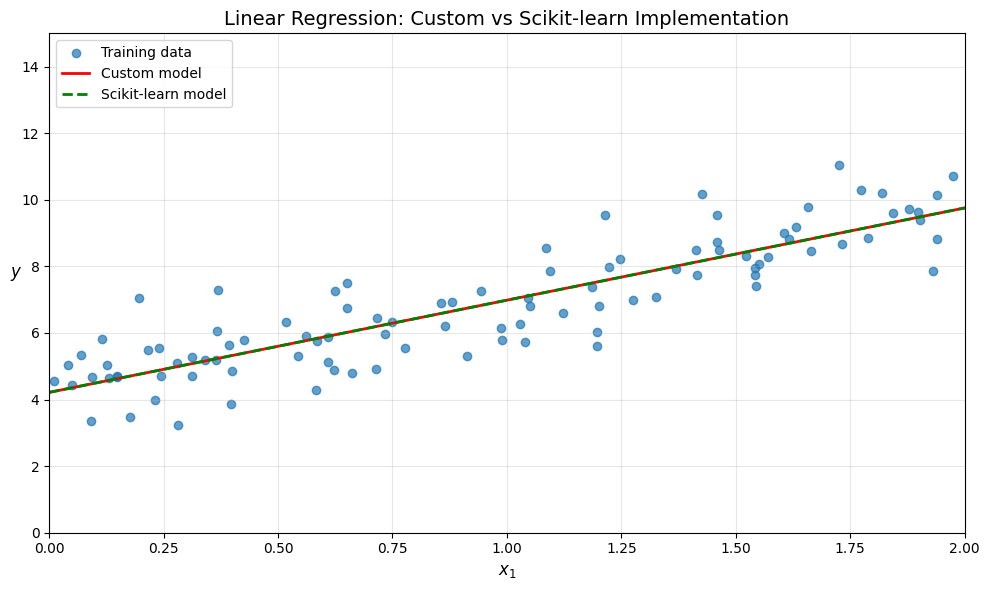

In [ ]:
# Create a visualization comparing both models
plt.figure(figsize=(10, 6))

# Plot original data
plt.scatter(X, y, alpha=0.7, label='Training data')

# Plot custom model predictions
plt.plot(X_new, custom_predictions, 'r-', linewidth=2, label='Custom model')

# Plot sklearn model predictions
plt.plot(X_new, sklearn_predictions, 'g--', linewidth=2, label='Scikit-learn model')

# Add labels and legend
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.axis([0, 2, 0, 15])
plt.grid(alpha=0.3)
plt.legend(loc="upper left")
plt.title("Linear Regression: Custom vs Scikit-learn Implementation", fontsize=14)

plt.tight_layout()
plt.show()


**Summary**

This implementation demonstrates:

1. How to solve linear regression using the normal equation (OLS method)

2. The mathematical foundation behind linear regression

3. The equivalence between our custom implementation and Scikit-Learn's implementation


---

The small differences in parameter values are due to numerical precision differences in the matrix inversion implementations, but both models produce essentially the same results.


---



The key steps in our implementation:

1. Add a column of 1s to handle the bias term

2. Compute XᵀX and Xᵀy

3. Calculate the pseudoinverse of XᵀX

4. Compute the optimal parameters θ = (XᵀX)⁻¹Xᵀy

This approach provides a clear understanding of the mathematical principles behind linear regression.


---



### **Gradient Descent Methods for Linear Regression**

**Introduction to Gradient Descent**

Gradient descent is an optimization algorithm used to minimize the cost function in machine learning models. For linear regression, we aim to minimize the Mean Squared Error (MSE) cost function:

J(θ) = (1/m) Σ (hθ(x⁽ⁱ⁾) - y⁽ⁱ⁾)²

Where:

* m is the number of training examples

* hθ(x) is our hypothesis function: hθ(x) = θ₀ + θ₁x₁ + ... + θₙxₙ

* θ represents our model parameters

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import add_dummy_feature
from sklearn.linear_model import SGDRegressor
from math import ceil


**Batch Gradient Descent**

In batch gradient descent, we compute the gradient using the entire training dataset at each iteration.

**Implementation**



In [ ]:
# Prepare the data
X = 2 * np.random.rand(100, 1)  # Feature values between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)  # Target with noise

# Add dummy feature for intercept term
X_b = add_dummy_feature(X)

# Set hyperparameters
eta = 0.1  # Learning rate
n_epochs = 1000
m = len(X_b)  # Number of instances

# Randomly initialize model parameters
np.random.seed(42)
theta = np.random.randn(2, 1)

# Batch Gradient Descent Algorithm
for epoch in range(n_epochs):
    # Compute gradients
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)

    # Update parameters
    theta = theta - eta * gradients

print("Final parameters after batch gradient descent:")
print(f"Intercept (θ₀): {theta[0][0]:.4f}")
print(f"Coefficient (θ₁): {theta[1][0]:.4f}")

Final parameters after batch gradient descent:
Intercept (θ₀): 3.8650
Coefficient (θ₁): 3.1392


### Visualization of Batch Gradient Descent



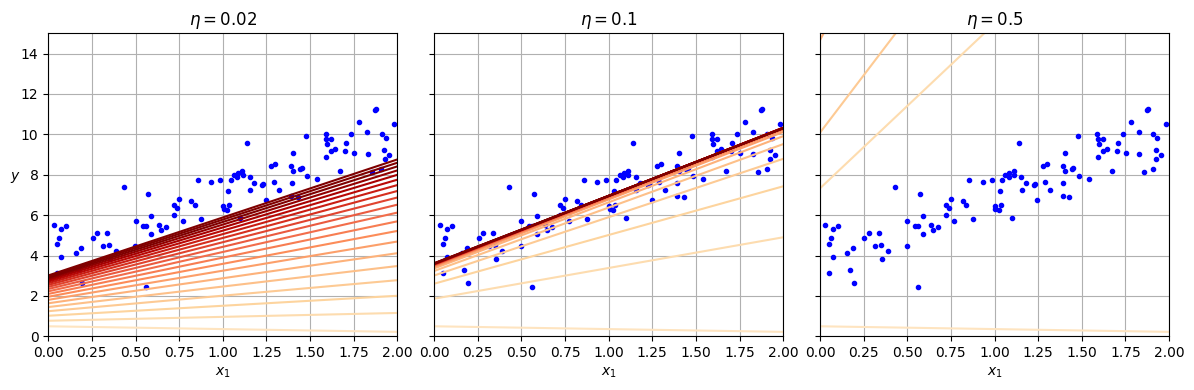

In [ ]:
def plot_gradient_descent(theta, eta):
    """
    Visualize the gradient descent process for different learning rates.

    Parameters:
    theta : array
        Initial parameter values
    eta : float
        Learning rate
    """
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []

    for epoch in range(n_epochs):
        if epoch < n_shown:
            # Create test points for visualization
            X_new = np.array([[0], [2]])
            X_new_b = add_dummy_feature(X_new)
            y_predict = X_new_b @ theta

            # Color gradient for visualization
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)

        # Compute gradients and update parameters
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)

    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

# Create visualization for different learning rates
np.random.seed(42)
theta = np.random.randn(2, 1)  # Random initialization

plt.figure(figsize=(12, 4))

plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)

plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])

plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)

plt.tight_layout()
plt.show()

### **Stochastic Gradient Descent (SGD)**

In SGD, we update parameters using only one training example at a time, making it faster but noisier.

**Implementation**


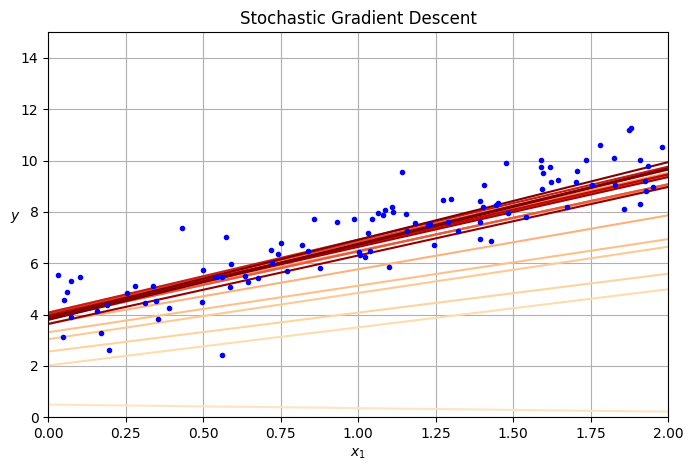

Final parameters after stochastic gradient descent:
Intercept (θ₀): 3.9052
Coefficient (θ₁): 3.1564


In [ ]:
# Initialize parameters
theta_path_sgd = []
n_epochs = 50
t0, t1 = 5, 50  # Learning schedule hyperparameters

def learning_schedule(t):
    """Decaying learning rate schedule."""
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # Random initialization

# Visualization setup
n_shown = 20
plt.figure(figsize=(8, 5))

# Stochastic Gradient Descent Algorithm
for epoch in range(n_epochs):
    for iteration in range(m):
        # Visualization for first epoch
        if epoch == 0 and iteration < n_shown:
            X_new = np.array([[0], [2]])
            X_new_b = add_dummy_feature(X_new)
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        # Randomly select a single training example
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]

        # Compute gradient for single example
        gradients = 2 * xi.T @ (xi @ theta - yi)  # Note: no division by m

        # Update learning rate
        eta = learning_schedule(epoch * m + iteration)

        # Update parameters
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # Store path for visualization

# Plot final result
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.title("Stochastic Gradient Descent")
plt.show()

print("Final parameters after stochastic gradient descent:")
print(f"Intercept (θ₀): {theta[0][0]:.4f}")
print(f"Coefficient (θ₁): {theta[1][0]:.4f}")

### Comparison with Scikit-Learn's SGD Implementation

In [ ]:
# Using Scikit-Learn's SGDRegressor
sgd_reg = SGDRegressor(
    max_iter=1000,
    tol=1e-5,
    penalty=None,
    eta0=0.01,
    n_iter_no_change=100,
    random_state=42
)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets

print("Scikit-Learn SGD parameters:")
print(f"Intercept (θ₀): {sgd_reg.intercept_[0]:.4f}")
print(f"Coefficient (θ₁): {sgd_reg.coef_[0]:.4f}")

Scikit-Learn SGD parameters:
Intercept (θ₀): 3.8613
Coefficient (θ₁): 3.1421


### **Mini-Batch Gradient Descent**

Mini-batch GD strikes a balance between batch GD and SGD by using small batches of data.

**Implementation**


In [ ]:
# Initialize parameters
n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # Random initialization

# Learning schedule
t0, t1 = 200, 1000

def learning_schedule(t):
    """Decaying learning rate schedule for mini-batch GD."""
    return t0 / (t + t1)

theta_path_mgd = []

# Mini-Batch Gradient Descent Algorithm
for epoch in range(n_epochs):
    # Shuffle data each epoch
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for iteration in range(0, n_batches_per_epoch):
        # Select mini-batch
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx:idx + minibatch_size]
        yi = y_shuffled[idx:idx + minibatch_size]

        # Compute gradients
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)

        # Update learning rate
        eta = learning_schedule(iteration)

        # Update parameters
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

print("Final parameters after mini-batch gradient descent:")
print(f"Intercept (θ₀): {theta[0][0]:.4f}")
print(f"Coefficient (θ₁): {theta[1][0]:.4f}")

Final parameters after mini-batch gradient descent:
Intercept (θ₀): 3.8804
Coefficient (θ₁): 3.1477


### Comparison of All Three Approaches


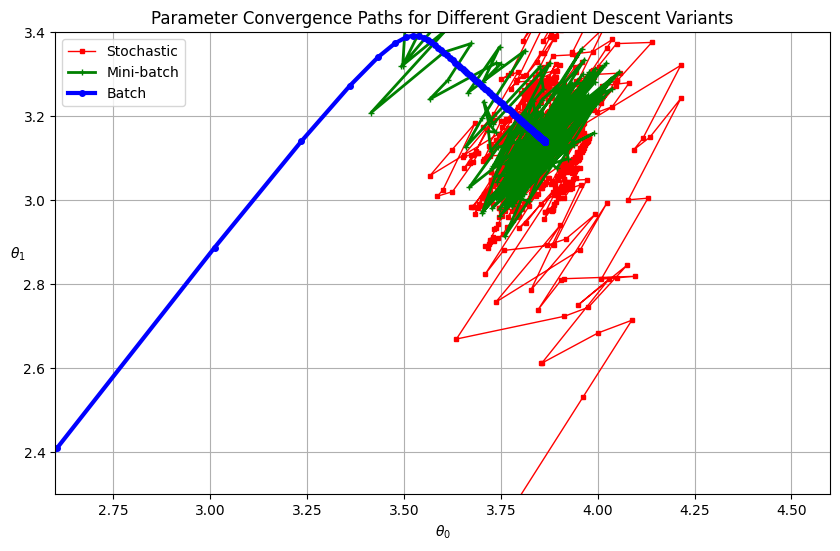

In [ ]:
# Convert paths to numpy arrays for plotting
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

# Create comparison plot
plt.figure(figsize=(10, 6))

plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic", markersize=3)
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch", markersize=4)
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch", markersize=4)

plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
plt.title("Parameter Convergence Paths for Different Gradient Descent Variants")
plt.show()

**Summary**



| Method | Pros | Cons | Best For |
|--------|------|------|----------|
| **Batch GD** | Stable convergence, deterministic | Slow for large datasets, requires full dataset | Small to medium datasets |
| **Stochastic GD** | Fast, can escape local minima | Noisy updates, may not converge exactly | Large datasets, online learning |
| **Mini-Batch GD** | Balance of speed and stability | Requires tuning batch size | Most practical applications |


All three methods eventually converge to similar parameter values, but they follow different paths and have different computational characteristics. The choice depends on your specific dataset size, computational resources, and accuracy requirements.


---



### **Polynomial Regression and Learning Curves**

**Introduction to Polynomial Regression**

Polynomial regression extends linear regression by adding powers of the original features as new features. This allows us to fit nonlinear relationships while still using a linear model.

The general form of a polynomial regression model is:
y = θ₀ + θ₁x + θ₂x² + ... + θₙxⁿ


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve



**Generate Nonlinear Data**

Let's create a quadratic dataset with some random noise to demonstrate polynomial regression.



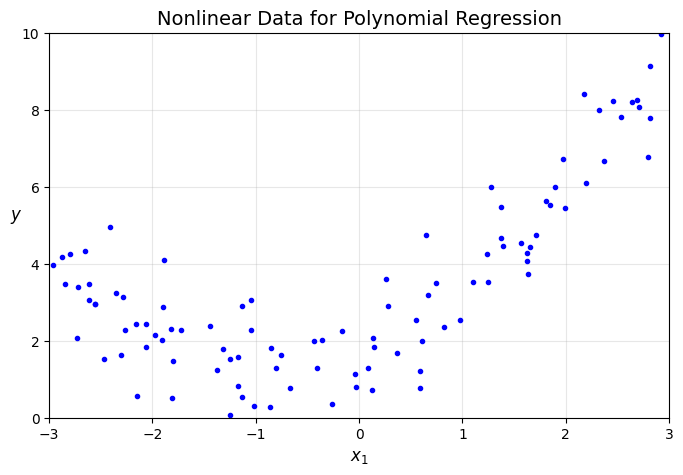

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random data
m = 100
X = 6 * np.random.rand(m, 1) - 3  # X values between -3 and 3

# Create quadratic relationship with noise: y = 0.5x² + x + 2 + noise
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

# Visualize the data
plt.figure(figsize=(8, 5))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.axis([-3, 3, 0, 10])
plt.grid(alpha=0.3)
plt.title("Nonlinear Data for Polynomial Regression", fontsize=14)
plt.show()



### **Polynomial Regression with Degree 2**

Let's fit a quadratic polynomial to our data.



In [ ]:
# Create polynomial features (degree 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(f"Original X shape: {X.shape}")
print(f"X after polynomial transformation: {X_poly.shape}")
print(f"First few rows of X_poly:\n{X_poly[:5]}")

Original X shape: (100, 1)
X after polynomial transformation: (100, 2)
First few rows of X_poly:
[[-0.75275929  0.56664654]
 [ 2.70428584  7.3131619 ]
 [ 1.39196365  1.93756281]
 [ 0.59195091  0.35040587]
 [-2.06388816  4.25963433]]



### **Fit Linear Regression on Polynomial Feature**

In [ ]:
# Fit linear regression on polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Display the estimated parameters
print("Estimated parameters:")
print(f"Intercept (θ₀): {lin_reg.intercept_[0]:.4f}")
print(f"Coefficient for x (θ₁): {lin_reg.coef_[0][0]:.4f}")
print(f"Coefficient for x² (θ₂): {lin_reg.coef_[0][1]:.4f}")

# Compare with true function parameters
print("\nTrue function parameters:")
print("y = 0.5x² + 1.0x + 2.0 + Gaussian noise")

Estimated parameters:
Intercept (θ₀): 1.7813
Coefficient for x (θ₁): 0.9337
Coefficient for x² (θ₂): 0.5646

True function parameters:
y = 0.5x² + 1.0x + 2.0 + Gaussian noise



### **Visualize the Polynomial Fit**

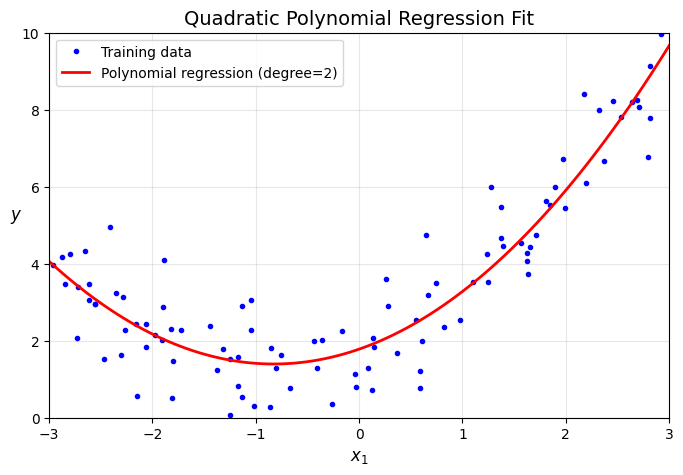

In [ ]:
# Generate test data for visualization
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(X, y, "b.", label="Training data")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Polynomial regression (degree=2)")
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid(alpha=0.3)
plt.title("Quadratic Polynomial Regression Fit", fontsize=14)
plt.show()

### **Comparing Different Polynomial Degrees**

Let's compare how different polynomial degrees fit the data, including the risk of overfitting.

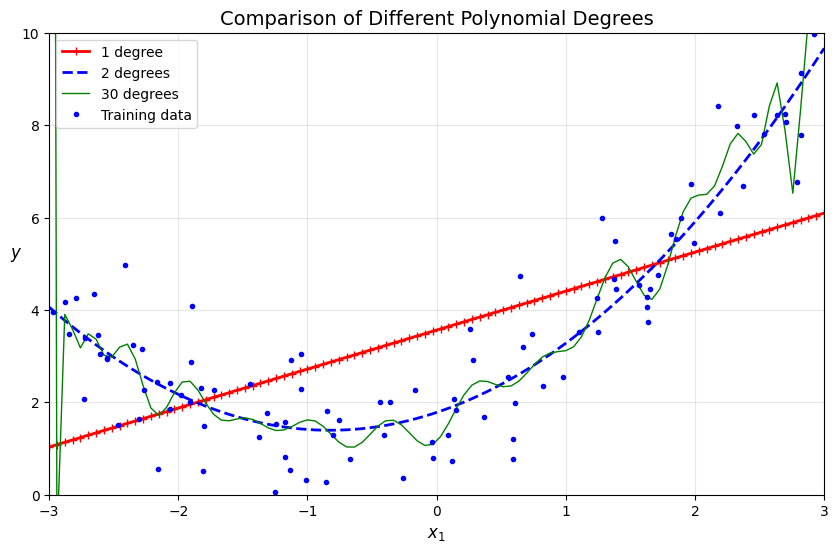

In [ ]:
# Create test data for visualization
X_new = np.linspace(-3, 3, 100).reshape(100, 1)

plt.figure(figsize=(10, 6))

# Try different polynomial degrees
for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 30)):
    # Create pipeline: polynomial features → standardization → linear regression
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)

    # Fit the model
    polynomial_regression.fit(X, y)

    # Make predictions
    y_newbig = polynomial_regression.predict(X_new)

    # Create label
    label = f"{degree} degree{'s' if degree > 1 else ''}"

    # Plot the results
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

# Plot original data
plt.plot(X, y, "b.", linewidth=3, label="Training data")
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.axis([-3, 3, 0, 10])
plt.grid(alpha=0.3)
plt.title("Comparison of Different Polynomial Degrees", fontsize=14)
plt.show()

### **Learning Curves**

Learning curves show how a model's performance changes as the training set size increases. They help diagnose bias and variance problems.


---



**Learning Curves for Linear Regression**

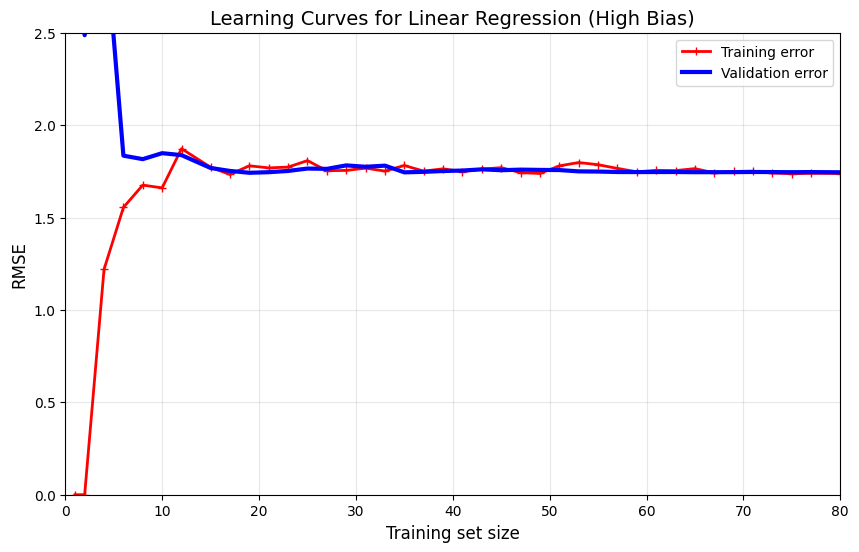

In [ ]:
# Generate learning curves for simple linear regression
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

# Calculate mean errors
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="Training error")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="Validation error")
plt.legend(loc="upper right")
plt.xlabel("Training set size", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.grid(alpha=0.3)
plt.axis([0, 80, 0, 2.5])
plt.title("Learning Curves for Linear Regression (High Bias)", fontsize=14)
plt.show()

### Learning Curves for Polynomial Regression (Degree=2)

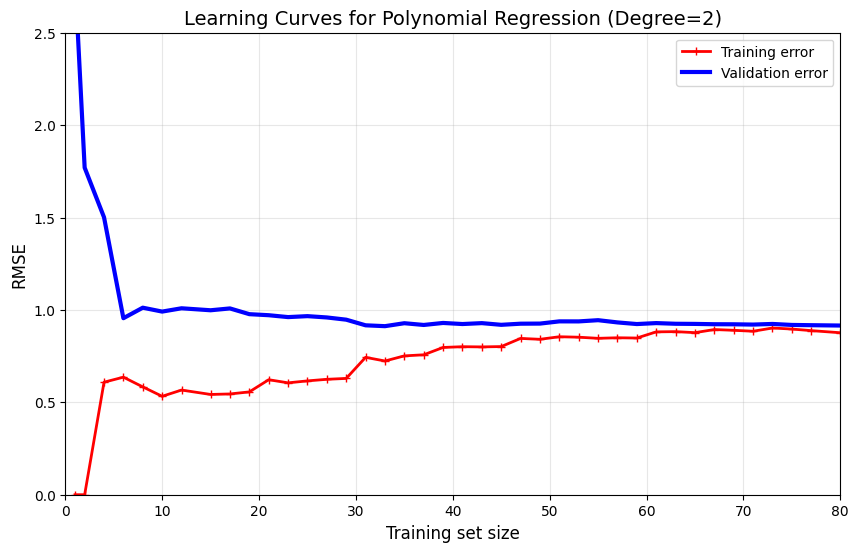

In [ ]:
# Create polynomial regression pipeline
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression())

# Generate learning curves
train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

# Calculate mean errors
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="Training error")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="Validation error")
plt.legend(loc="upper right")
plt.xlabel("Training set size", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.grid(alpha=0.3)
plt.axis([0, 80, 0, 2.5])
plt.title("Learning Curves for Polynomial Regression (Degree=2)", fontsize=14)
plt.show()

### **Interpretation of Learning Curves**

**1. Linear Regression (High Bias):**

* Both training and validation errors are high

* Adding more training data doesn't help significantly

* The model is too simple to capture the underlying pattern

**2. Polynomial Regression (Degree=2):**

* Errors are lower for both training and validation

* The gap between training and validation errors is small

* This indicates a good fit to the data

**3. High-Degree Polynomial (Overfitting):**

* Training error is very low but validation error is high

* Large gap between training and validation errors

* The model has memorized the training data but doesn't generalize well



---
**Summary**

Polynomial regression allows us to model nonlinear relationships by adding polynomial features. Key points:

1. The appropriate polynomial degree is crucial - too low causes underfitting, too high causes overfitting

2. Learning curves help diagnose bias-variance tradeoffs

3. For our quadratic data, a 2nd-degree polynomial provides the best fit

4. Standardization is important for higher-degree polynomials to ensure stable training

The model successfully estimated the underlying quadratic relationship:

* Estimated: y = 0.56x² + 0.93x + 1.78

* True: y = 0.5x² + 1.0x + 2.0 + noise




---



### **Regularization and Logistic Regression**

I've organized your code with detailed explanations and visualizations to better understand regularization techniques and logistic regression.


---



**Bias-Variance Tradeoff**


The bias-variance tradeoff is a fundamental concept in machine learning:

**High Bias:** Model is too simple, leads to underfitting

**High Variance:** Model is too complex, leads to overfitting

**Ideal Balance:** Model that captures patterns without memorizing noise

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap


### **Regularization Techniques**

Regularization helps prevent overfitting by adding a penalty term to the loss function, discouraging complex models.

### **Ridge Regression (L2 Regularization)**

Ridge regression adds a penalty equal to the square of the magnitude of coefficients.

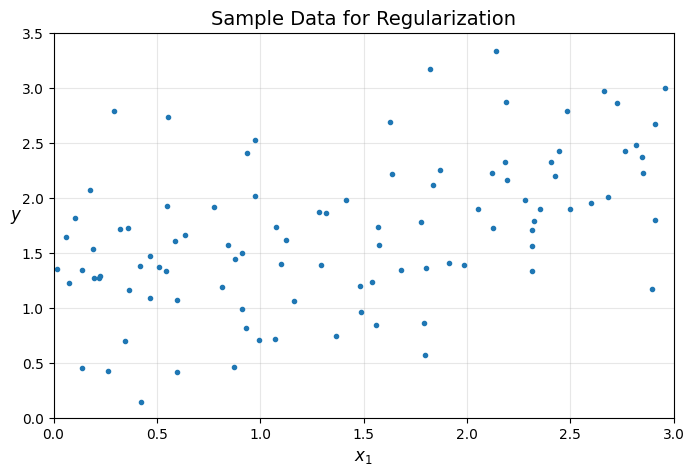

In [ ]:
# Generate sample data
np.random.seed(42)
m = 100
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

# Visualize the data
plt.figure(figsize=(8, 5))
plt.plot(X, y, ".")
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.axis([0, 3, 0, 3.5])
plt.grid(alpha=0.3)
plt.title("Sample Data for Regularization", fontsize=14)
plt.show()

### **Ridge Regression Implementation**

In [ ]:
# Create and fit ridge regression model
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)

# Make prediction
prediction = ridge_reg.predict([[1.5]])
print(f"Ridge regression prediction for x=1.5: {prediction[0]:.4f}")


Ridge regression prediction for x=1.5: 1.7401


### **Visualizing Ridge Regression with Different Alpha Values**

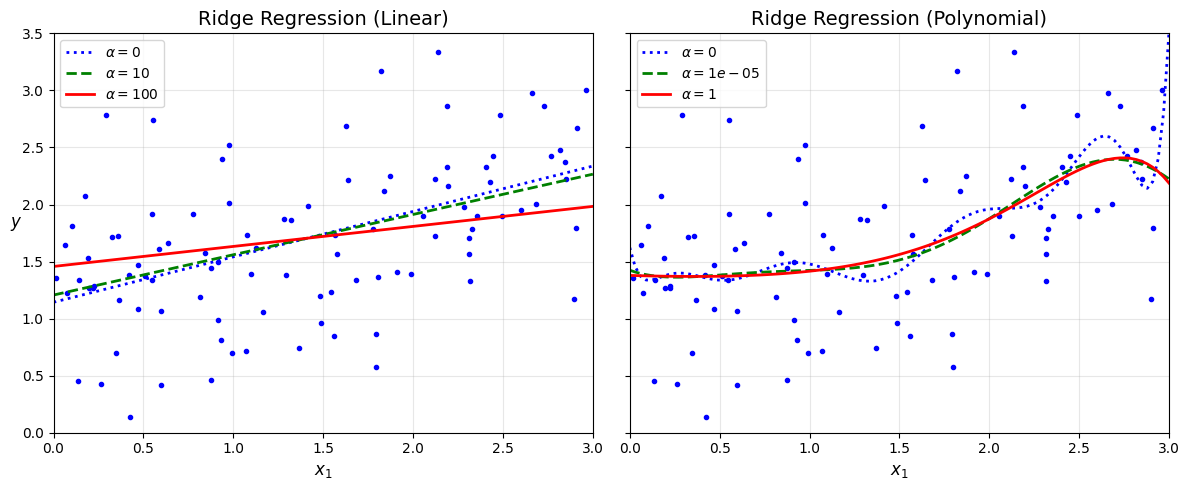

In [ ]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    """
    Helper function to plot models with different regularization strengths.
    """
    # Generate test data
    X_new = np.linspace(0, 3, 100).reshape(-1, 1)

    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()

        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)

        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")

    plt.legend(loc="upper left")
    plt.xlabel("$x_1$", fontsize=12)
    plt.axis([0, 3, 0, 3.5])
    plt.grid(alpha=0.3)

# Plot ridge regression with different alpha values
plt.figure(figsize=(12, 5))

plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.title("Ridge Regression (Linear)", fontsize=14)

plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.title("Ridge Regression (Polynomial)", fontsize=14)

plt.tight_layout()
plt.show()

### Lasso Regression (L1 Regularization)

Lasso regression adds a penalty equal to the absolute value of the magnitude of coefficients, which can drive some coefficients to zero (feature selection).

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.575])

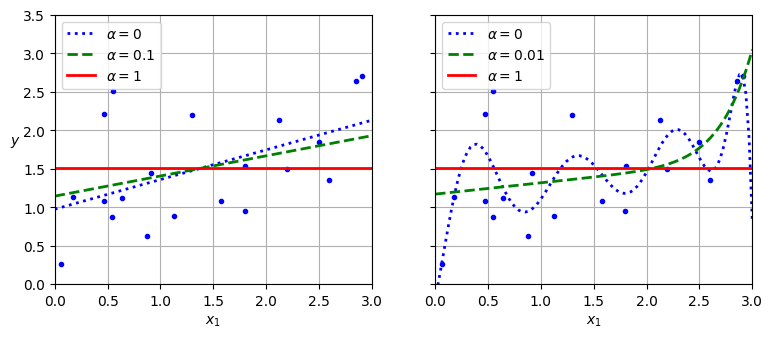

In [ ]:
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

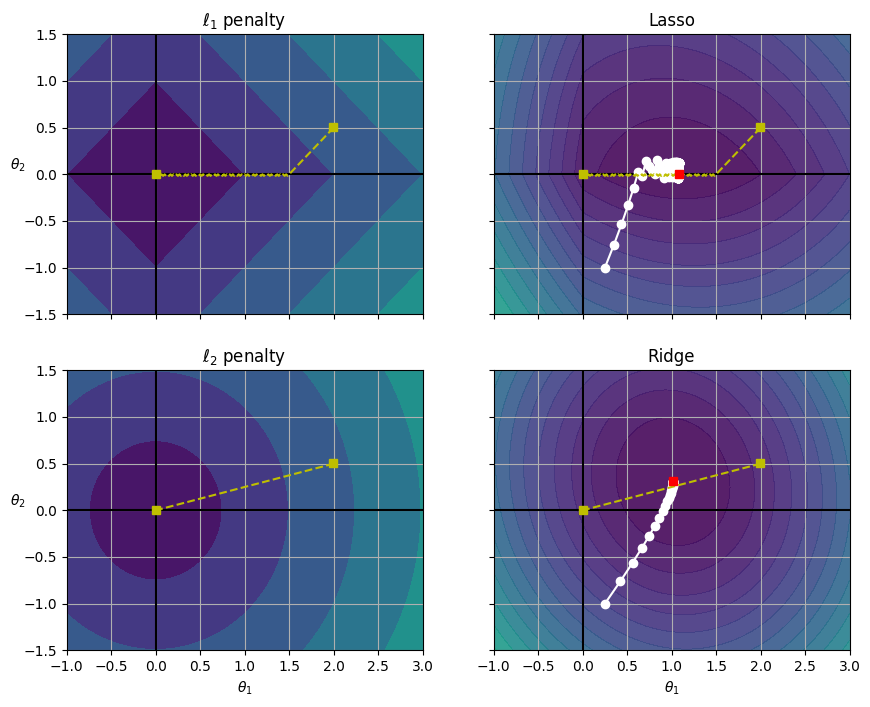

In [ ]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")


plt.show()

### **Elastic Net Regression**

Elastic Net is a combination of Ridge and Lasso regularization.

In [ ]:
from sklearn.linear_model import ElasticNet

# Create and fit elastic net model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y.ravel())  # y.ravel() ensures target is 1D

# Make prediction
prediction = elastic_net.predict([[1.5]])
print(f"Elastic Net prediction for x=1.5: {prediction[0]:.4f}")

Elastic Net prediction for x=1.5: 1.7327


### **Logistic Regression**

Logistic regression is used for classification problems. It models the probability that an instance belongs to a particular class.

### **Sigmoid Function**

The sigmoid function maps any real value to a value between 0 and 1.

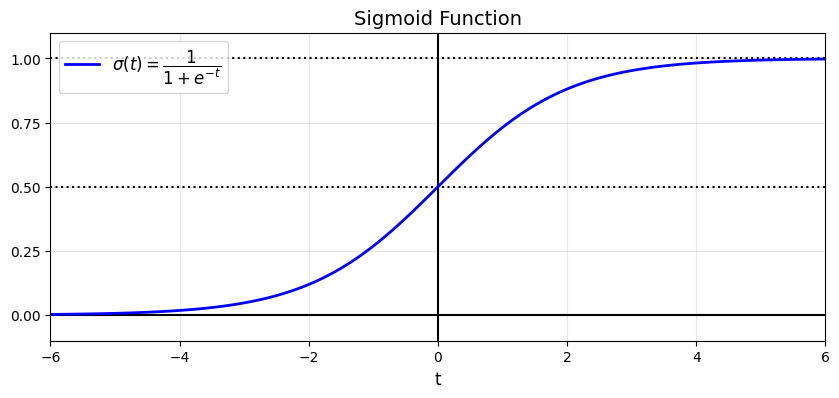

In [ ]:
# Plot the sigmoid function
lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(10, 4))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t", fontsize=12)
plt.legend(loc="upper left", fontsize=12)
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid(alpha=0.3)
plt.title("Sigmoid Function", fontsize=14)
plt.show()

### **Binary Classification with Logistic Regression**

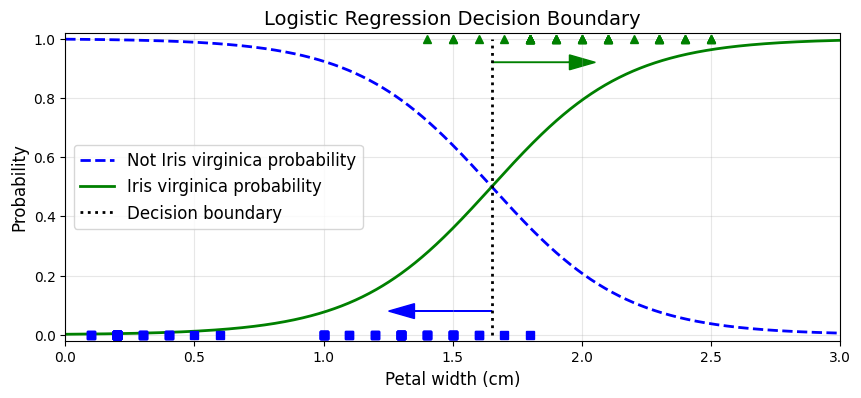

Decision boundary at petal width: 1.65 cm
Prediction for petal width 1.7 cm: Iris virginica
Prediction for petal width 1.5 cm: Not Iris virginica


In [ ]:
# Load iris dataset
iris = load_iris(as_frame=True)

# Prepare data for binary classification
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create and train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Generate predictions for visualization
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

# Plot the results
plt.figure(figsize=(10, 4))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica probability")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica probability")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# Add arrows
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")

# Plot training data
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")

plt.xlabel("Petal width (cm)", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.legend(loc="center left", fontsize=12)
plt.axis([0, 3, -0.02, 1.02])
plt.grid(alpha=0.3)
plt.title("Logistic Regression Decision Boundary", fontsize=14)
plt.show()

print(f"Decision boundary at petal width: {decision_boundary:.2f} cm")

# Make predictions
predictions = log_reg.predict([[1.7], [1.5]])
print(f"Prediction for petal width 1.7 cm: {'Iris virginica' if predictions[0] else 'Not Iris virginica'}")
print(f"Prediction for petal width 1.5 cm: {'Iris virginica' if predictions[1] else 'Not Iris virginica'}")

### **Multivariate Logistic Regression**

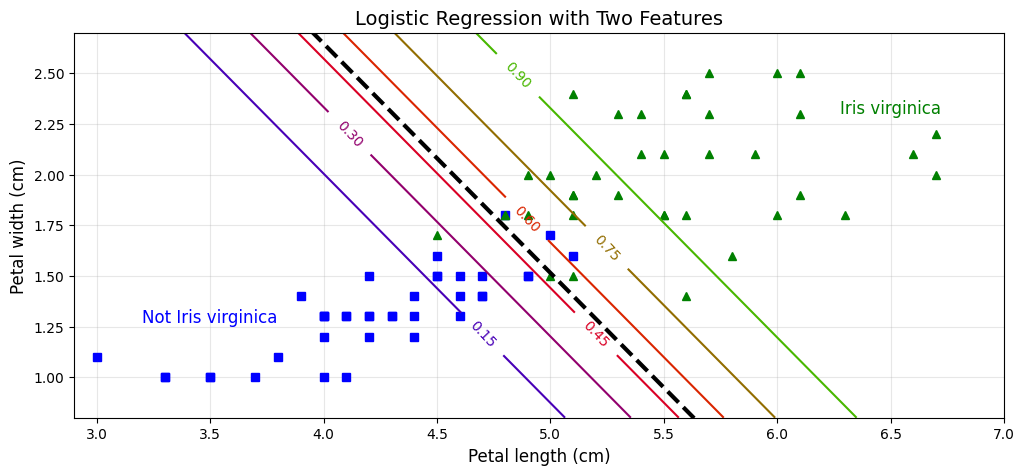

In [ ]:
# Use two features for classification
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create and train logistic regression model
log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# Create mesh grid for visualization
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# Calculate decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=10)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center", fontsize=12)
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center", fontsize=12)
plt.xlabel("Petal length (cm)", fontsize=12)
plt.ylabel("Petal width (cm)", fontsize=12)
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid(alpha=0.3)
plt.title("Logistic Regression with Two Features", fontsize=14)
plt.show()

### **Softmax Regression (Multinomial Logistic Regression)**

Softmax regression generalizes logistic regression to multiple classes.

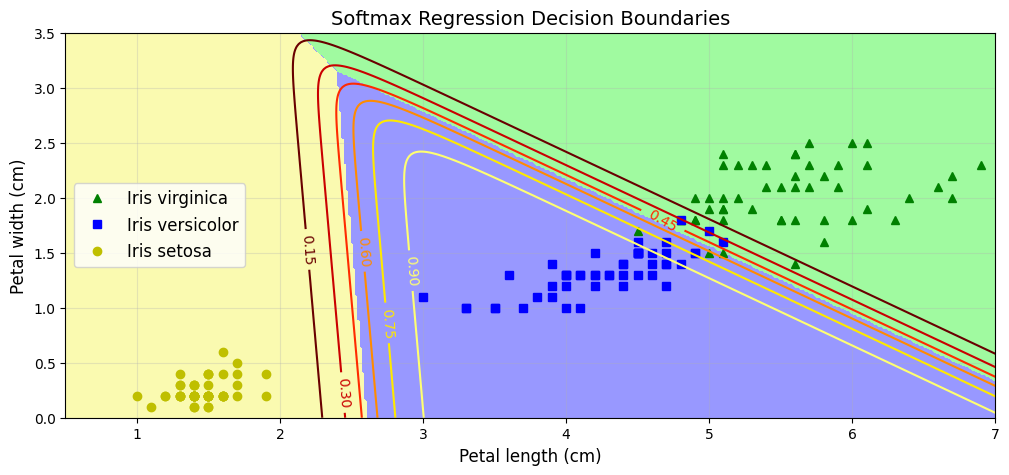

In [ ]:
# Prepare data for multiclass classification
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create and train softmax regression model
softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

# Create mesh grid for visualization
custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1, fontsize=10)
plt.xlabel("Petal length (cm)", fontsize=12)
plt.ylabel("Petal width (cm)", fontsize=12)
plt.legend(loc="center left", fontsize=12)
plt.axis([0.5, 7, 0, 3.5])
plt.grid(alpha=0.3)
plt.title("Softmax Regression Decision Boundaries", fontsize=14)
plt.show()

### **Summary**

## Regularization Techniques Comparison

| Technique | Regularization Type | Effect | Best For |
|-----------|---------------------|--------|----------|
| **Ridge** | L2 | Shrinks coefficients evenly | When all features are potentially relevant |
| **Lasso** | L1 | Can zero out coefficients (feature selection) | When you suspect only a few features matter |
| **Elastic Net** | L1 + L2 | Balance of Ridge and Lasso | When dealing with correlated features |

### When to Use Each Approach

1. Plain Linear Regression: Rarely used in practice - some regularization is almost always beneficial

2. Ridge Regression: Good default choice for regression problems

3. Lasso Regression: When you suspect only a few features are important

4. Elastic Net: When features are correlated or when you want a balance between Ridge and Lasso

5. Logistic Regression: For binary classification problems

6. Softmax Regression: For multiclass classification problems

Regularization helps find the right balance between bias and variance, leading to models that generalize well to new data.